In [1]:
import numpy as np
from scipy.interpolate import BarycentricInterpolator
def chebyshev_points(n):
    return np.cos((2*np.arange(n) + 1) * np.pi / (2 * n))

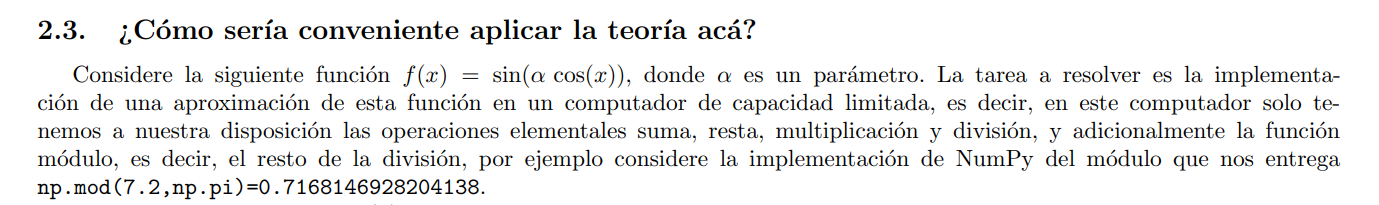

In [2]:
#algoritmo 1

def polynomialInterpolation_f(alpha,n):
    x_che = chebyshev_points(n)
    f = lambda x: np.sin(alpha*np.cos(x))
    y_che = f(x_che)
    baricentric_interpolator = BarycentricInterpolator(x_che,y_che)
    return baricentric_interpolator


In [3]:
#algoritmo 2

def compositeConstructionSinCos(n):
    f_sin = lambda x: np.sin(x)
    f_cos = lambda x: np.cos(x)
    x_che = chebyshev_points(n)
    y_sin = f_sin(x_che)
    y_cos = f_cos(x_che)
    p_sin = BarycentricInterpolator(x_che,y_sin)
    p_cos = BarycentricInterpolator(x_che,y_cos)
    return p_sin, p_cos

def compositeEvaluationSinCos(f_cos,f_sin,alpha,x):
    return f_sin(alpha*f_cos(x))

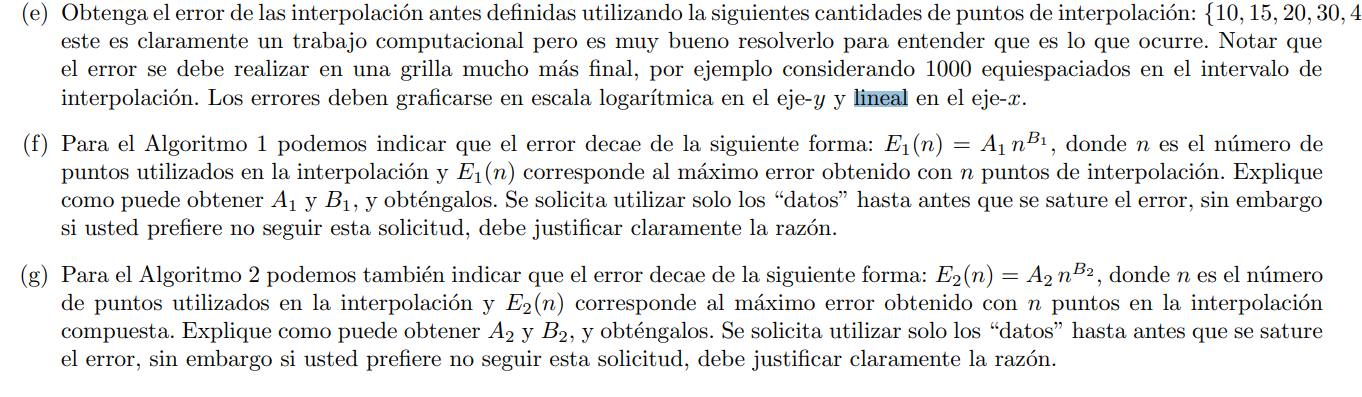

In [9]:
#por realizar

def interpolation_error(alpha, n, num_points=1000):
    interpolator = polynomialInterpolation_f(alpha, n)
    f = lambda x: np.sin(alpha * np.cos(x))
    x_test = np.linspace(-1, 1, num_points)
    f_values = f(x_test)
    interpolated_values = interpolator(x_test)
    error = np.abs(f_values - interpolated_values)
    max_error = np.max(error)
    
    return max_error, error
alpha = 1
n = 15
max_error, error_distribution = interpolation_error(alpha, n)
print(f"Error máximo de interpolación: {max_error}")

Error máximo de interpolación: 2.7066682228849004e-11


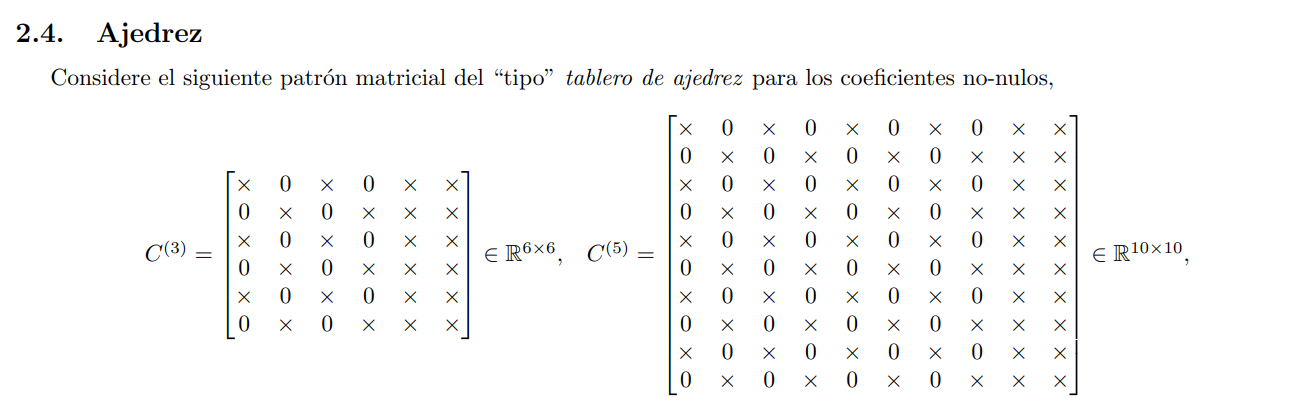
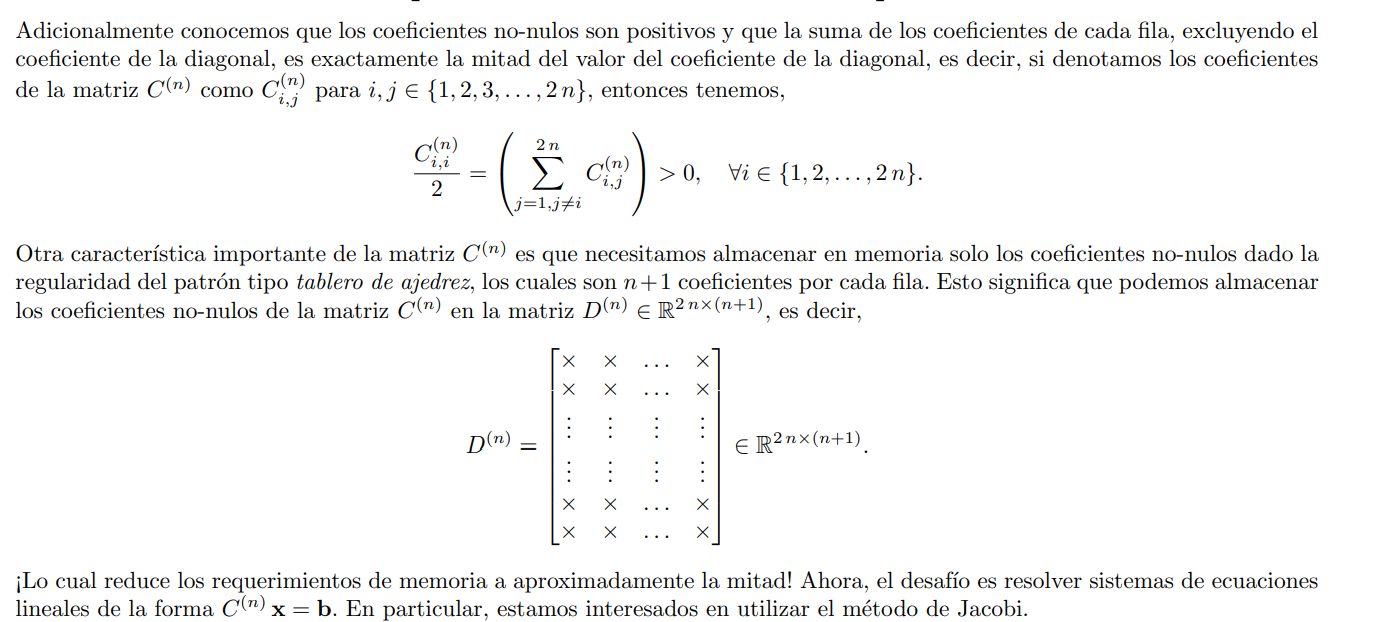

a) Obtener el número de operaciones elementales a realizar para realizar una iteración del método de Jacobi, que resuleve $C^{(n)}x= b$ tomando en consideración la estrcutura de a matriz.

______________________________________________________


*desarrollo aqui*

______________________________________________________



b) determina si el método de jacobi converge o no al utilizarlo en el sistema de ecuaciones lineales $C^{(n)}x= b$

______________________________________________________


Dado la singularidad de la matriz C con respecto a que la suma de los coeficientes de la matriz, excluyendo la diagonal, es exactamente menor al coeficiente de la diagonal, que es uno de los requerimientos que pide Jacobi para poder determinar si converge o no el método, por otro lado, también tenemos la información que los coeficientes no nulos son reales positivos, que también es algo imporatnte al momento de implementar Jacobi.
______________________________________________________


c) Implemente una iteración de Jacobi utilizando los siguientes inputs: 
- n : (int64) Super index of C^{(n)} and D^{(n)}
- Dn : (ndarray) Matrix of coefficients of dimension 2*n times (n+1).
- b : (ndarray) Array of dimension 2*n with the coefficientes of the right-hand-side of Cn*x=b.
- x0 : (ndarray) Array of dimension 2*n with the initial guess x0.

output:
- x1 : (ndarray) Array of dimension 2*n that stores the output of one iteration of the Jacobi method.




In [11]:
def OneStepJacobi(n, Dn, b, x0):
    D_inv = np.diag(1 / np.diag(Dn))  

    LU = Dn - np.diag(np.diag(Dn))  

    x1 = D_inv @ (b - LU @ x0)
    return x1


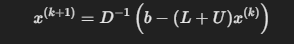 Iteracion de Jacobi

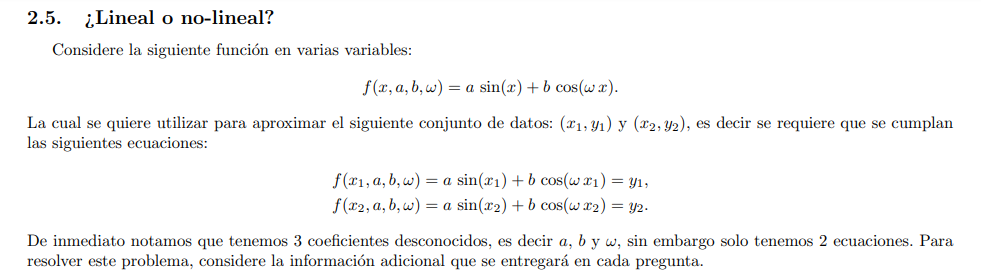

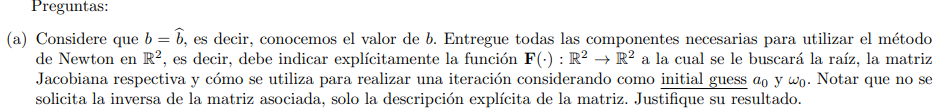

$f(a,\omega) = \alpha\sin(x_1) +\hat{\beta}\cos(\omega x_1) - y_1 = 0$


$f(a,\omega) = \alpha\sin(x_2) +\hat{\beta}\cos(\omega x_2) - y_2 = 0$

Donde nuestro vector de incognitas es $\vec{r} = [a_0, \omega_0]$ y la función F a buscar la raíz es $ \vec{F}(\vec{r}) = [f_1(\vec{r}),f_2(\vec{r})]$

y la iteración quedaría de este estilo:
$$ \vec{r_{k+1}} = \vec{r} - J^{-1}_{\vec{F}(\vec{r})}(\vec{r_k}) * \vec{F}(\vec{r_k})$$
$$ = \vec{_k} - \Delta{\vec{r_k}}$$



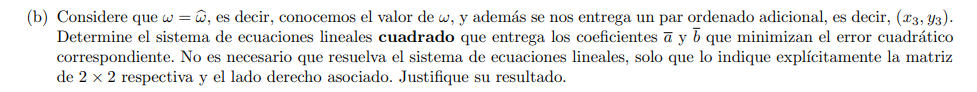

$$
f_1(a,\omega) = \alpha\sin(x_1) +\hat{\beta}\cos(\omega x_1) - y_1 = 0\\
f_2(a,\omega) = \alpha\sin(x_2) +\hat{\beta}\cos(\omega x_2) - y_2 = 0\\
f_3(a,\omega) = \alpha\sin(x_3) +\hat{\beta}\cos(\omega x_3) - y_3 = 0\\

$$

Según el sistema anterior tenemos que el vector $\vec{r} = [a_0,\omega_0]$ igualmente pero la matriz $\vec{F}(\vec{r}) = [f_1(\vec{r}),f_2(\vec{r}),f_3(\vec{r})]$
Para trabajar con minimos cuadrados debemos buscar resolver el siguiente sistema de ecuaciones: $A^{*}A\vec{x}= A^{*}{\vec{b}}$
por lo que tendríamos el siguiente sistema de ecuaciones lineales:

$$
\left(\begin{array}{cc} 
\sin x_1 & \cos(\omega x_1)\\
\sin x_2 & \cos(\omega x_2)\\
\sin x_2 & \cos(\omega x_3)
\end{array}\right)
\left(\begin{array}{cc} 
\overline{a}  \\ 
\overline{b}  
\end{array}\right)
=\left(\begin{array}{cc}
y_1 \\
y_2\\
y_3 \\
\end{array}\right)
$$ 
Aplicando lo anterior tenemos lo siguiente:

$$
\left(\begin{array}{cc} 
\sum_{i = 1}^{3} \sin^{2} x_i & \sum_{i = 1}^{3} \sin x_i \cos(\omega x_i)\\
 \sum_{i = 1}^{3} \sin x_i \cos(\omega x_i) & \sum_{i = 1}^{3} \cos^{2}(\omega x_i)\\
\end{array}\right)
\left(\begin{array}{cc} 
\overline{a}  \\ 
\overline{b}  
\end{array}\right)
= \left(\begin{array}{cc} 
\sin x_1 & \sin x_2  & \sin x_3 \\
\cos(\omega x_1) & \cos(\omega x_2) & \cos(\omega x_3)
\end{array}\right)
\left(\begin{array}{cc}
y_1 \\
y_2\\
y_3 \\
\end{array}\right)
$$

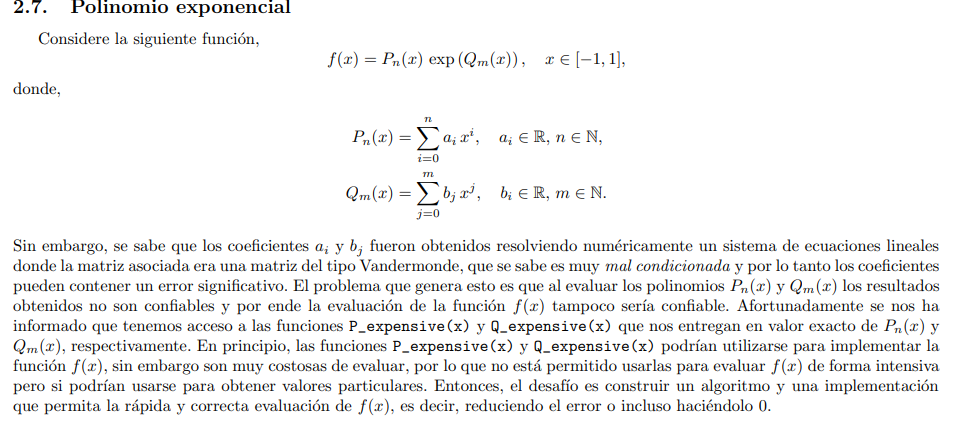

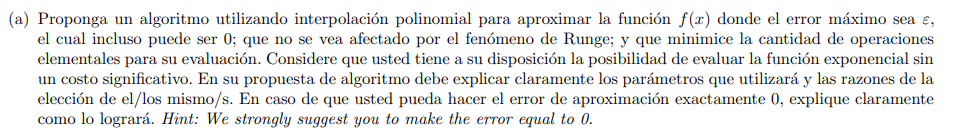

Primero debemos considerar la cantidad de puntos a utilizar, en este caso lo ajustaremos a las variables de n y m, para crear un interpolador por cada polinomio, como se nos pide que el interpolador no se vea afectado por el fenomeno de Runge es necesario utilizar puntos de Chebyshev y teniendo en cuenta el dominio por el cual transita la variable x, no es necesario trasladar los puntos, de igual manera podemos conseguir un valor para el error utilizando estos puntos. Los parametros a utilizar son n, m, e. e corresponde al error y nos servirá para realizar una cota al error que estamos dispuestos a tolerar.
1. Debemos calcular los valores de x para ambos polinomios según los respectivos valores de n y m, asegurando el valor 0 (utilizando chebyshev)
2. Utilizar las funciones p_expensive (x) y q_expensive(x) para calcular los valores de y en ambos polinomios.
3. Crear un interpolador utilizando interpolación baricentrica para ambos conjunto de puntos.

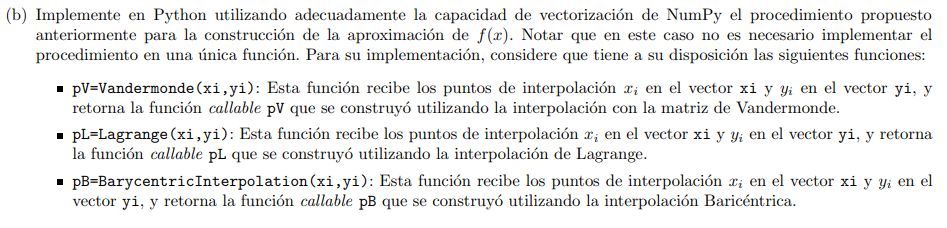

In [ ]:
def interpolatorP_Q(n,m,P_expensive,Q_expensive):
    
    x_che_n = chebyshev_points(n+1)
    x_che_m = chebyshev_points(m+1)
    yn = P_expensive(x_che_n)
    ym = Q_expensive(x_che_m)
    interpolator_n = BarycentricInterpolator(x_che_n,yn)
    interpolator_m = BarycentricInterpolator(x_che_m,ym)
    return interpolator_n,interpolator_m

def interpolatorF(x,P,Q):
    return P(x)*np.exp(Q(x))

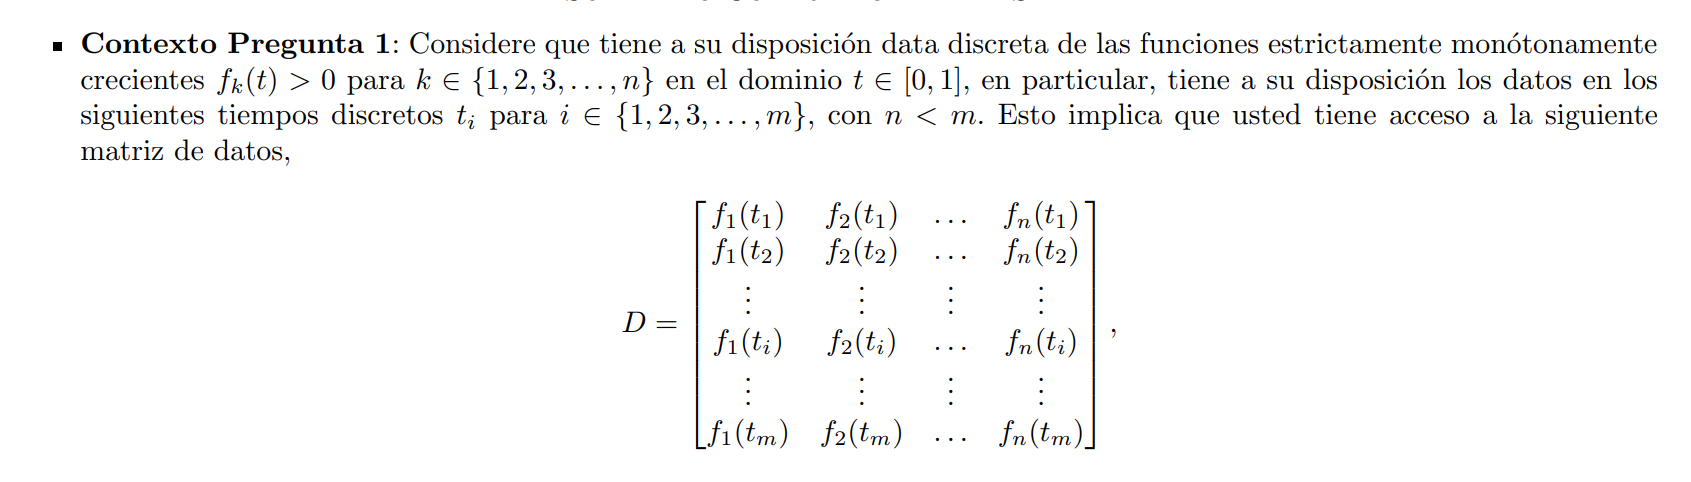

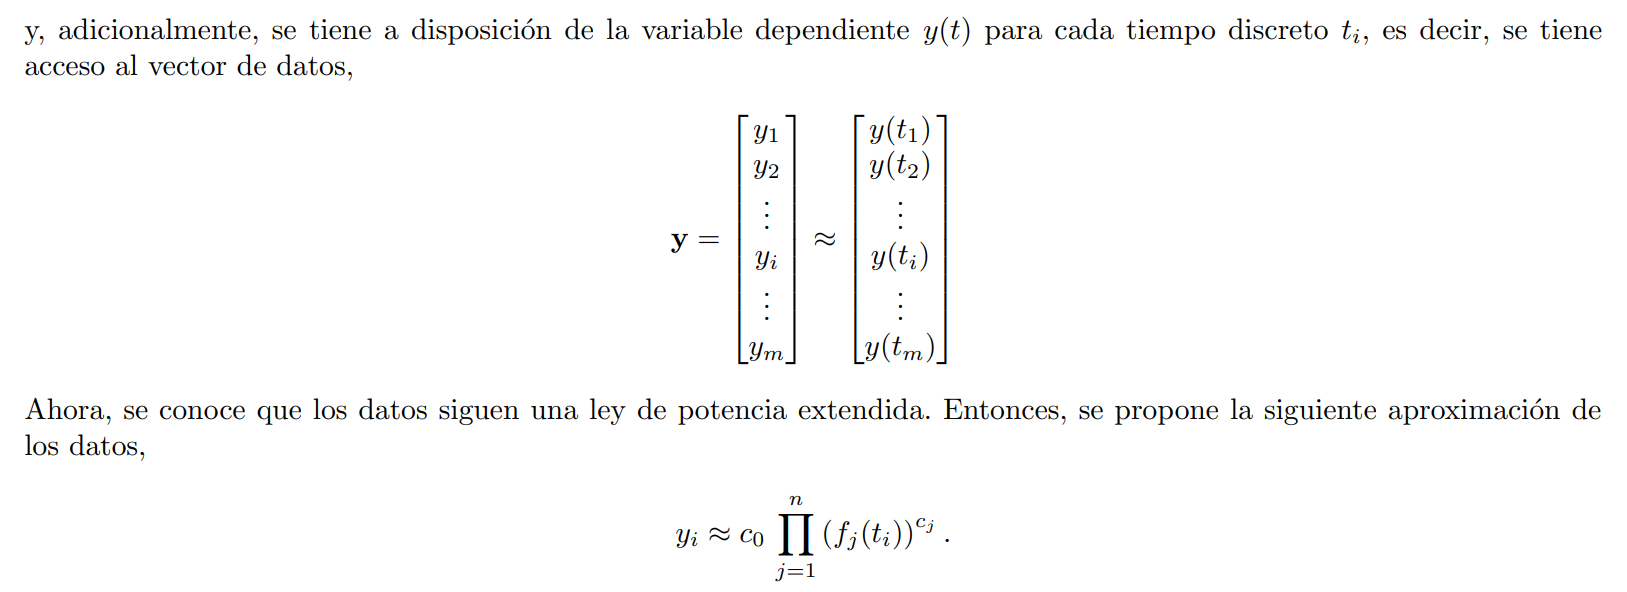

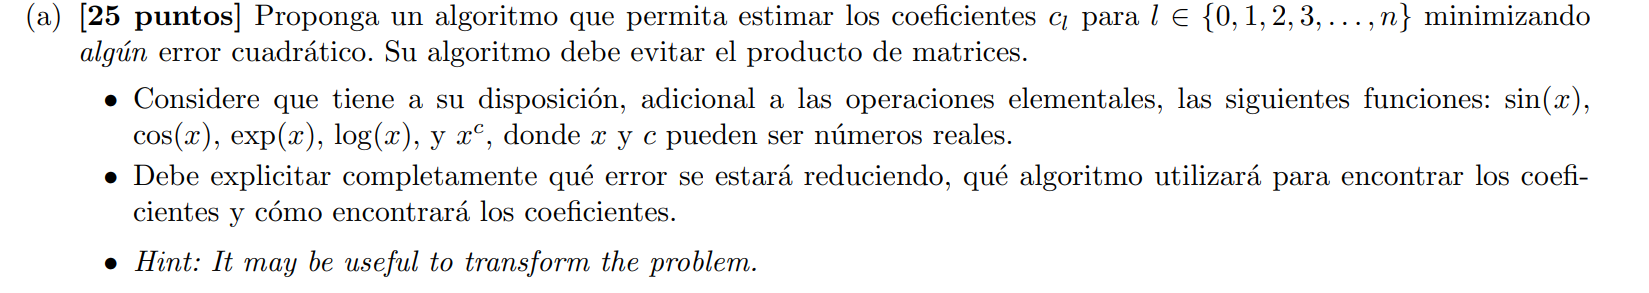